## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [39]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [40]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [41]:
# Combine dfs into one
study_combo_df = pd.merge(mouse_metadata, study_results, how = 'left', on = 'Mouse ID')
study_combo_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice.
len(study_combo_df['Mouse ID'].unique())

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = study_combo_df[study_combo_df.duplicated(['Mouse ID', 'Timepoint'])]
dupe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 



In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_combo_df.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [46]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = study_combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = study_combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = study_combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = study_combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = study_combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summ_df = pd.DataFrame({'Mean' : mean,'Median' : median, 'Variance' : variance,'Standard Deviation' : std,'SEM' : sem,})
summ_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Mouse Count')

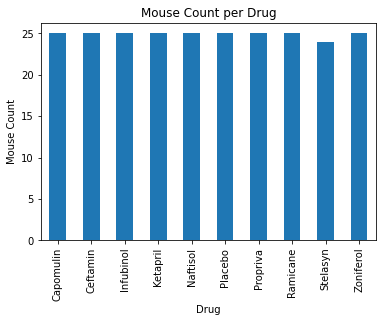

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data = study_combo_df.groupby('Drug Regimen').nunique()['Mouse ID']
drug_box_plot = drug_data.plot.bar(title = 'Mouse Count per Drug')

drug_box_plot.set_xlabel('Drug')
drug_box_plot.set_ylabel('Mouse Count')

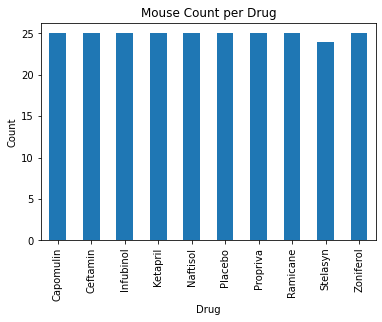

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_data_pyplot = study_combo_df.groupby('Drug Regimen').nunique()['Mouse ID']
drug_data_pyplot = pd.DataFrame(drug_data_pyplot)
drug_data_pyplot.plot.bar(legend = False)
plt.title('Mouse Count per Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'Male vs Female'}, ylabel='Mouse ID'>

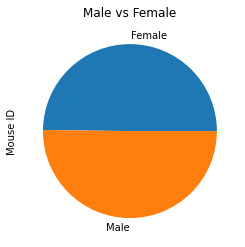

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mvf_plot = study_combo_df.groupby('Sex').nunique()['Mouse ID']
mvf_plot.plot.pie(title = 'Male vs Female')


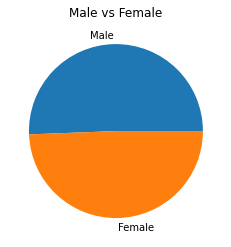

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mvf_pyplot = study_combo_df['Sex'].value_counts()
plt.pie(mvf_pyplot, labels = mvf_pyplot.index.values)
plt.title('Male vs Female')
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(study_combo_df.groupby('Mouse ID')['Timepoint'].max())
max_tp_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(study_combo_df, max_tp_df, on = 'Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [74]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []
# Create empty list to fill with tumor vol data (for plotting)
for i in drugs:
    temp_df = merge_df.loc[merge_df['Drug Regimen'] == i]
    
    final_temp_df = temp_df.loc[temp_df['Timepoint_x'] == temp_df['Timepoint_y']]
    value = final_temp_df['Tumor Volume (mm3)']
    drug_values.append(value)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = value.quantile([.25, .5, .75])
    lowq = quartile[.25]
    highq = quartile[.75]
    iqr = highq - lowq
    
    print(f'IQR of {i}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    low_bound = lowq - (1.5 * iqr)
    high_bound = highq + (1.5 * iqr)
    print(f'Lower Bound of {i}: {low_bound}')
    print(f'Upper Bound of {i}: {high_bound}')

IQR of Capomulin: 7.781863460000004
Lower Bound of Capomulin: 20.70456164999999
Upper Bound of Capomulin: 51.83201549
IQR of Ramicane: 9.098536719999998
Lower Bound of Ramicane: 17.912664470000003
Upper Bound of Ramicane: 54.30681135
IQR of Infubinol: 11.477135160000003
Lower Bound of Infubinol: 36.83290494999999
Upper Bound of Infubinol: 82.74144559000001
IQR of Ceftamin: 15.577752179999997
Lower Bound of Ceftamin: 25.355449580000002
Upper Bound of Ceftamin: 87.66645829999999


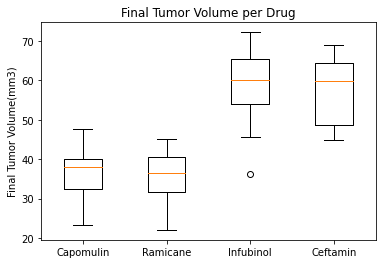

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values)
plt.title('Final Tumor Volume per Drug')
plt.ylabel('Final Tumor Volume(mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

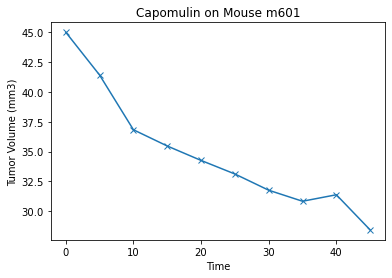

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
test_case = study_combo_df.loc[study_combo_df['Mouse ID'] == 'm601']
plt.plot(test_case['Timepoint'], test_case['Tumor Volume (mm3)'], marker = 'x')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin on Mouse m601')
plt.show()

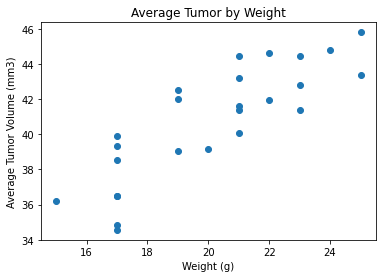

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = study_combo_df.loc[study_combo_df['Drug Regimen'] == 'Capomulin']
capo_avg_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())

capo_avg_df = pd.merge(capo_df, capo_avg_df, on = 'Mouse ID')

final_capo_df = capo_avg_df[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()

x = final_capo_df['Weight (g)']
y = final_capo_df['Tumor Volume (mm3)_y']

plt.scatter(x,y)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor by Weight')
plt.show()

## Correlation and Regression

The correlation between weight (g) and tumor volume for Capomulin is (0.8419363424694718, 2)


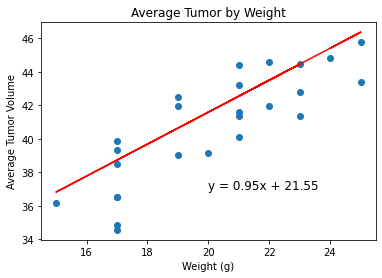

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

capo_df = study_combo_df.loc[study_combo_df['Drug Regimen'] == 'Capomulin']
capo_avg_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())

capo_avg_df = pd.merge(capo_df, capo_avg_df, on = 'Mouse ID')

final_capo_df = capo_avg_df[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()

x = final_capo_df['Weight (g)']
y = final_capo_df['Tumor Volume (mm3)_y']


corr = st.pearsonr(x,y)
print(f'The correlation between weight (g) and tumor volume for Capomulin is {corr[0],2}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress = x * slope + slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x, y)
plt.plot(x, regress, 'r-')

plt.annotate(line_eq, (20,37), fontsize = 12, color = 'black')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor by Weight')
plt.show()